# Explore here

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Problema:

Calcúlar válor de prima, para cada uno de los clientes de la aseguradora según datos físiologicos

In [3]:
# Clasificación de variables y valores faltantes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
def separar_columnas(df):
    # Listas vacías para almacenar los nombres de las columnas categóricas y numéricas
    categoricas = []
    numericas = []
    
    # Iterar por las columnas del DataFrame
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numericas.append(col)
        else:
            categoricas.append(col)
    
    return print(f'Categóricas: {categoricas}\nNúmericas: {numericas}')

separar_columnas(df)

Categóricas: ['sex', 'smoker', 'region']
Númericas: ['age', 'bmi', 'children', 'charges']


In [15]:
# Verificación de filas duplicadas

print(f'Filas Duplicadas: {df.duplicated().sum()}')

# Eliminación de filas duplicadas

df = df.drop_duplicates()
print(f'Filas Duplicadas tras eliminación: {df.duplicated().sum()}')

Filas Duplicadas: 1
Filas Duplicadas tras eliminación: 0


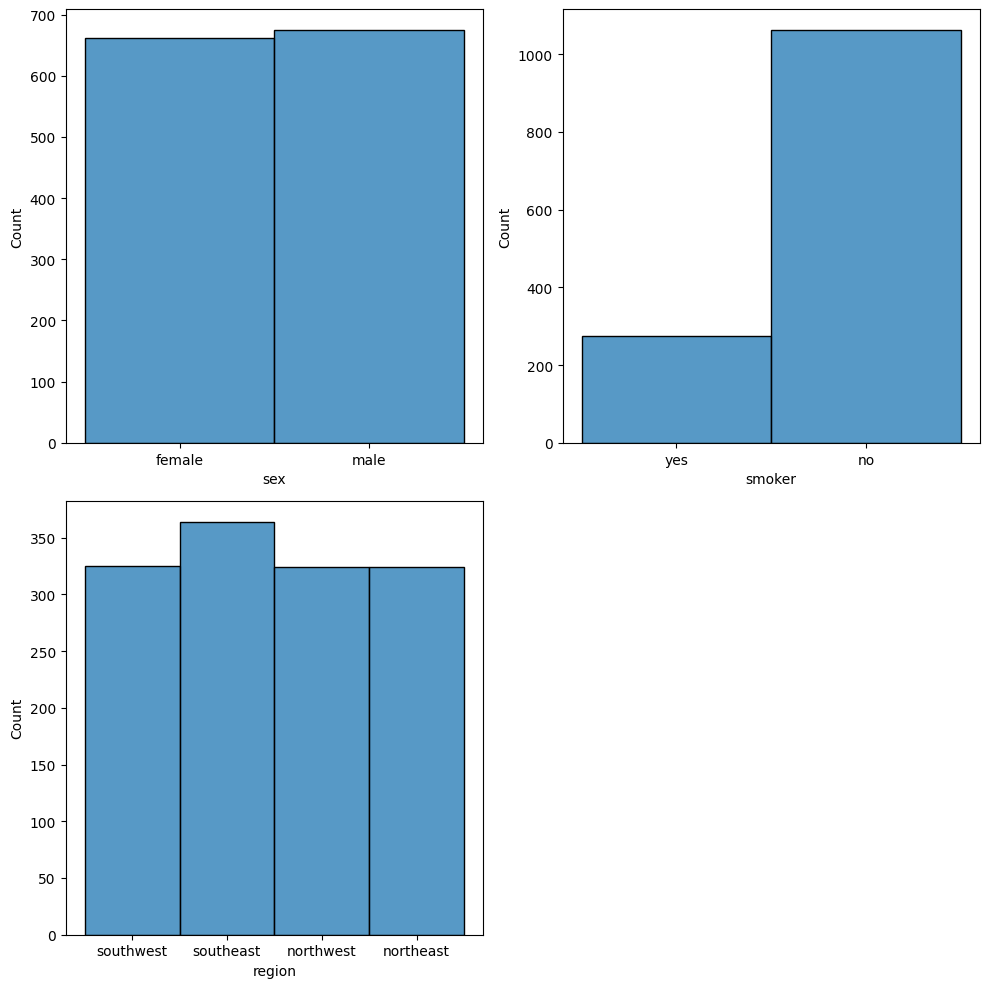

In [18]:
# Análisis Univariante 
    #Categorico

fig, axis = plt.subplots(2,2,figsize=(10,10))

#histogramas
sns.histplot(ax= axis[0,0],data=df,x='sex')
sns.histplot(ax= axis[0,1],data=df,x='smoker')
sns.histplot(ax= axis[1,0],data=df,x='region')


fig.delaxes(axis[1,1])
plt.tight_layout()
plt.show()

In [19]:
separar_columnas(df)

Categóricas: ['sex', 'smoker', 'region']
Númericas: ['age', 'bmi', 'children', 'charges']


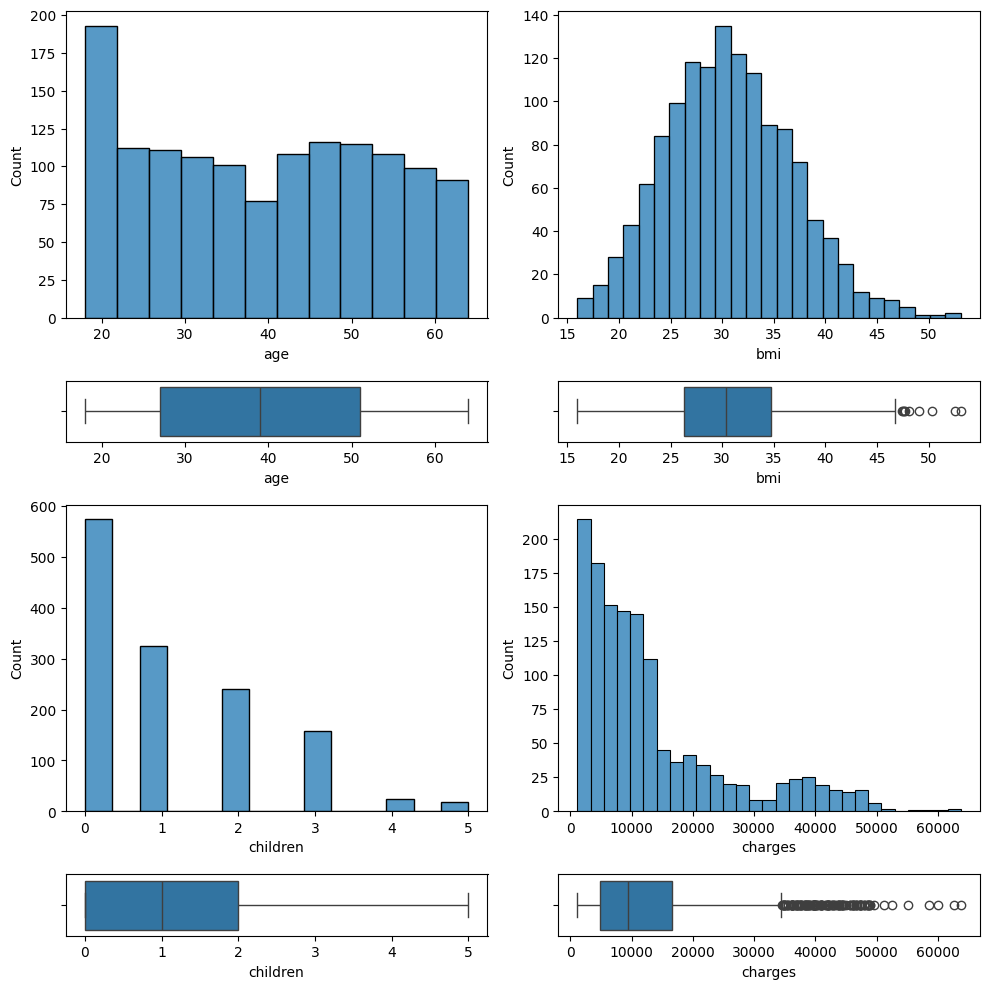

In [23]:
    # Númerico

fig, axis = plt.subplots(4,2,figsize=(10,10),gridspec_kw={"height_ratios":[5,1,5,1]}) 

sns.histplot(ax=axis[0,0],data=df,x='age')
sns.boxplot(ax=axis[1,0],data=df,x='age')

sns.histplot(ax=axis[0,1],data=df,x='bmi')
sns.boxplot(ax=axis[1,1],data=df,x='bmi')

sns.histplot(ax=axis[2,0],data=df,x='children')
sns.boxplot(ax=axis[3,0],data=df,x='children')

sns.histplot(ax=axis[2,1],data=df,x='charges')
sns.boxplot(ax=axis[3,1],data=df,x='charges')

plt.tight_layout()
plt.show()
            

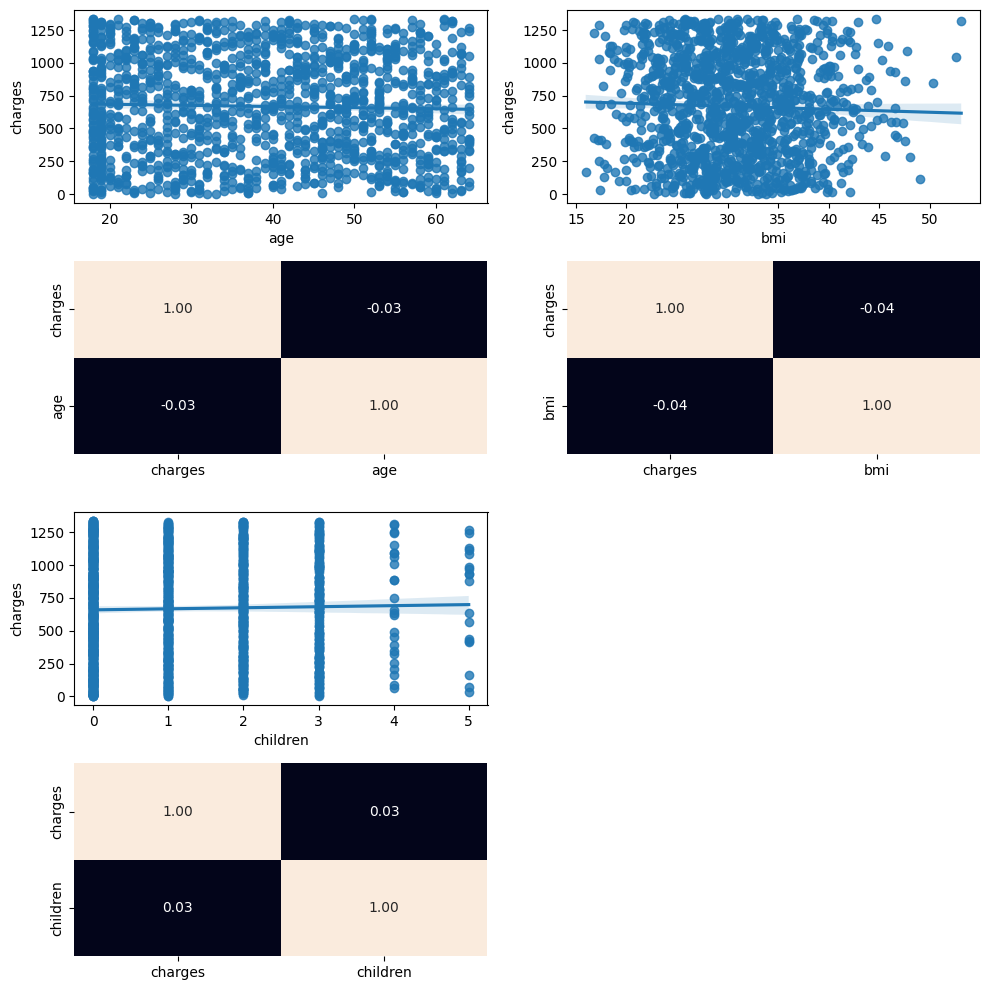

In [26]:
# Análisis Multivariante
    # Númerico - númerico

fig, axis = plt.subplots(4,2,figsize=(10,10))

sns.regplot(ax=axis[0,0], data=df, x="age", y="charges")
sns.heatmap(df[['charges','age']].corr(),annot=True,fmt='.2f',ax=axis[1,0],cbar=False)

sns.regplot(ax=axis[0,1], data=df, x="bmi", y="charges")
sns.heatmap(df[['charges','bmi']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax=axis[2,0], data=df, x="children", y="charges")
sns.heatmap(df[['charges','children']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)

fig.delaxes(axis[3,1])
fig.delaxes(axis[2,1])
plt.tight_layout()
plt.show()

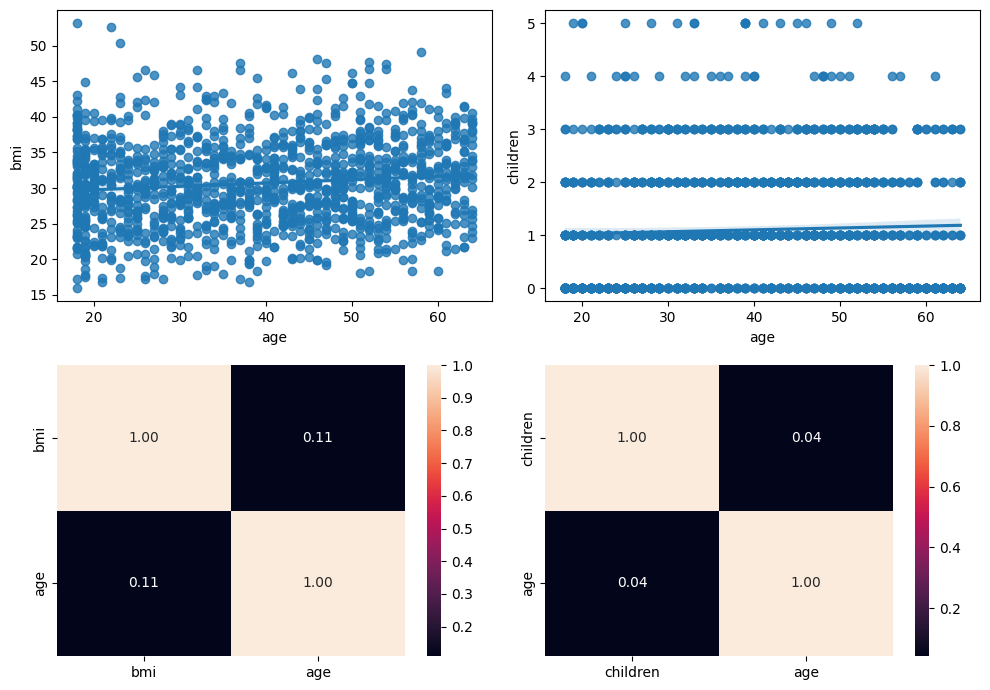

In [35]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0,0], data = df, x = "age", y = "bmi")
sns.heatmap(df[["bmi", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0])

sns.regplot(ax = axis[0,1], data = df, x = "age", y = "children")
sns.heatmap(df[["children", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1])


plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

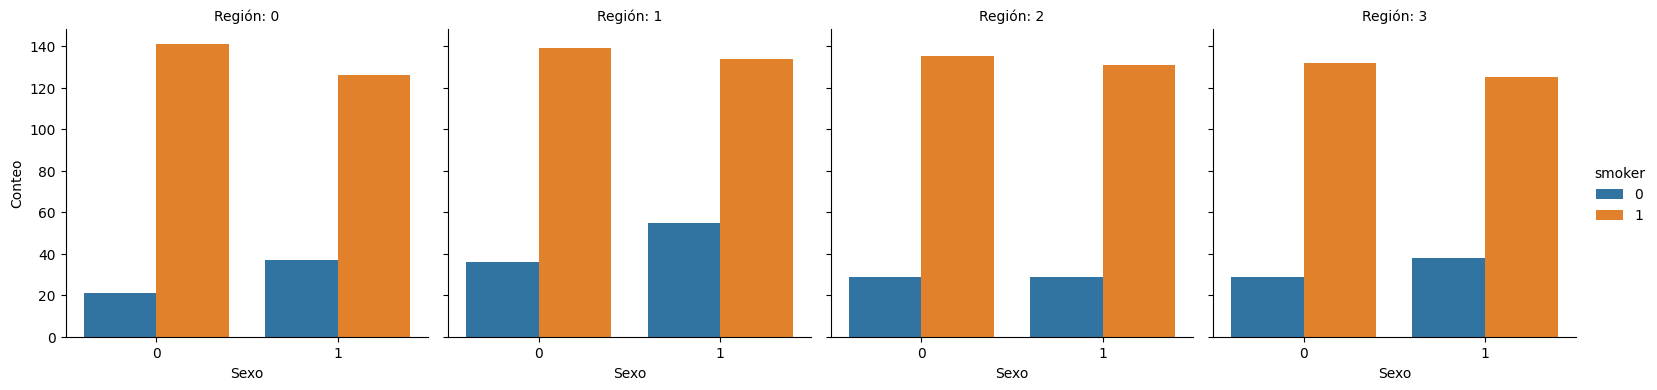

In [47]:
#Análisi Categórico - Categórico

plt.figure(figsize=(10, 6))

g = sns.catplot(data=df, x='sex', hue='smoker', col='region', kind='count', height=4, aspect=1)
g.set_axis_labels('Sexo', 'Conteo')
g.set_titles(col_template='Región: {col_name}')
plt.show()



In [36]:
    # Factorización de variables cátegoricas

df['sex'] = pd.factorize(df['sex'])[0]
df['smoker'] = pd.factorize(df['smoker'])[0]
df['region'] = pd.factorize(df['region'])[0]


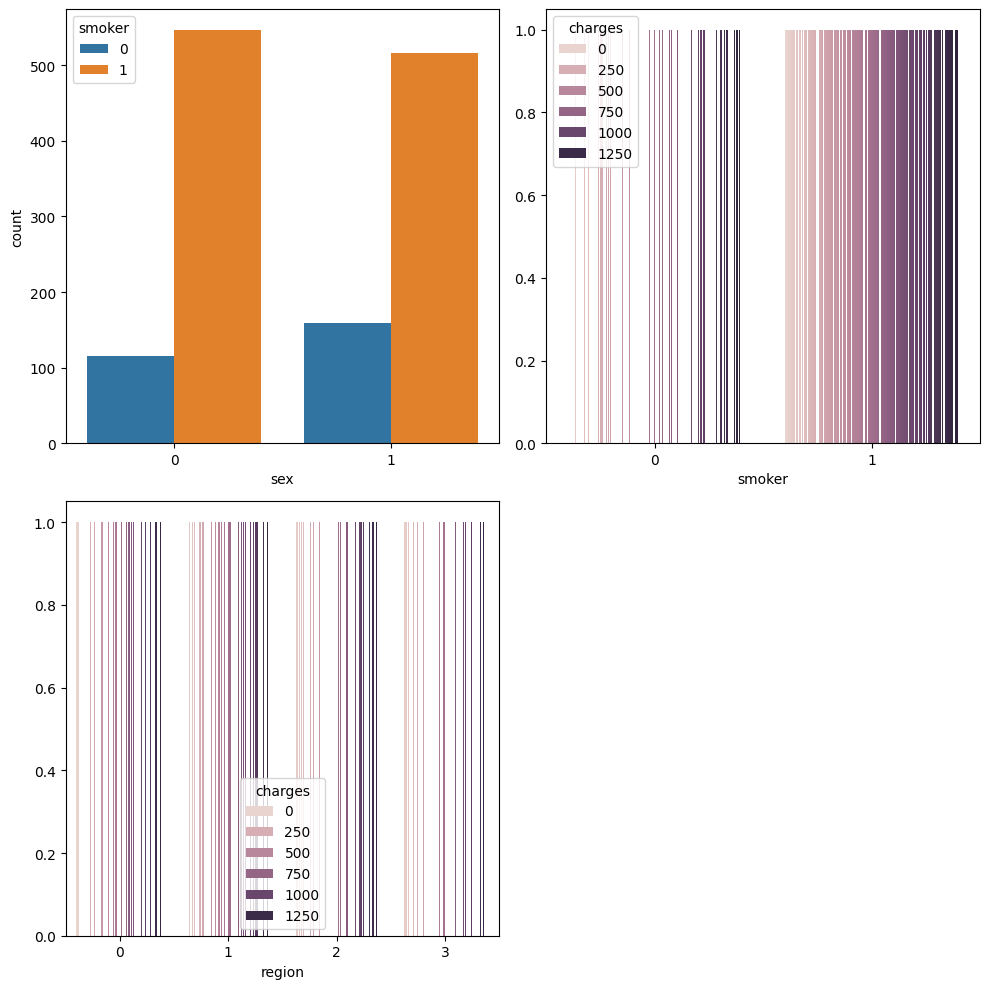

In [39]:

fig, axis = plt.subplots(2, 2, figsize = (10, 10))

sns.countplot(ax = axis[0, 0], data = df, x = "sex", hue = "smoker",)
sns.countplot(ax = axis[0, 1], data = df, x = "smoker", hue = "charges").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = df, x = "region", hue = "charges").set(ylabel = None)

fig.delaxes(axis[1, 1])
plt.tight_layout()
plt.show()

EDA

Linealidad: La variable objetivo y la(s) predictora(s) tienen una relación lineal.
Independencia: Las observaciones son independientes unas de otras.
Homoscedasticidad: La varianza de los errores (es decir, las diferencias entre las predicciones del modelo y los datos reales) es constante en todos los niveles de las variables independientes.
Normalidad de los errores: Los errores están normalmente distribuidos. Esto es importante para la realización de pruebas estadísticas y para construir intervalos de confianza.
Ausencia de multicolinealidad: En una regresión múltiple, las variables independientes no están perfectamente correlacionadas entre sí. Si hay correlación perfecta, se dice que los datos tienen multicolinealidad (hay variables que son iguales) y dificulta el cálculo de los coeficientes.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

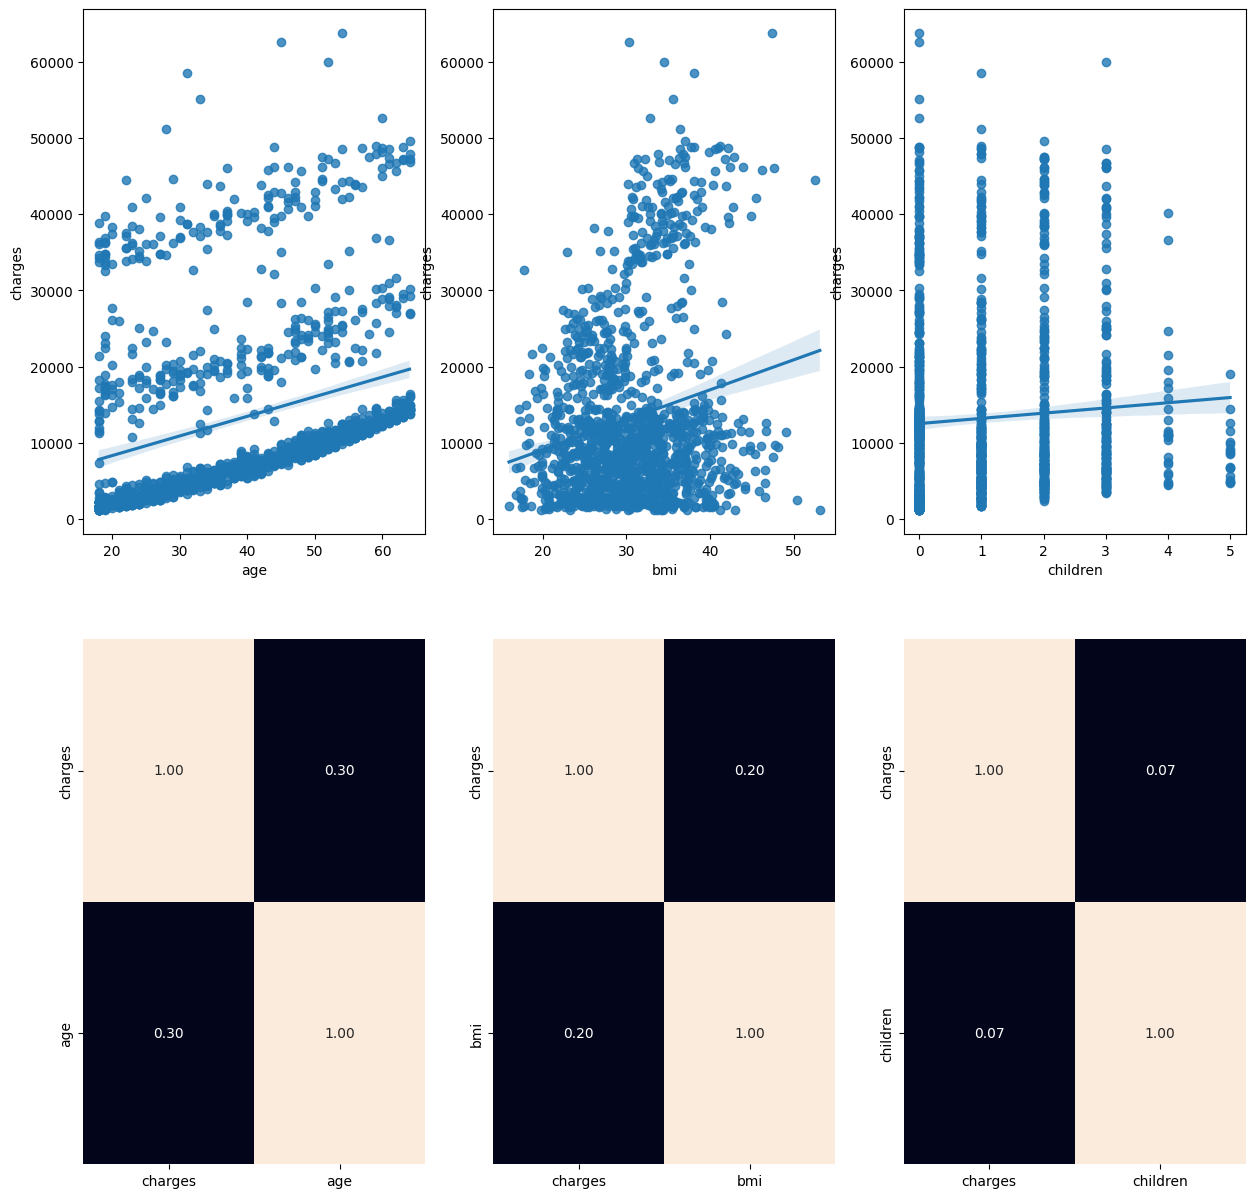

In [5]:
fig, axis = plt.subplots(2,3,figsize=(15,15))

sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges")
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = df, x = "children", y = "charges")
sns.heatmap(df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)


Despues del EDA

In [6]:
df['sex_n'] = pd.factorize(df['sex'])[0]
df['smoker_n'] = pd.factorize(df['smoker'])[0]
df['region_n'] = pd.factorize(df['region'])[0]
df

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


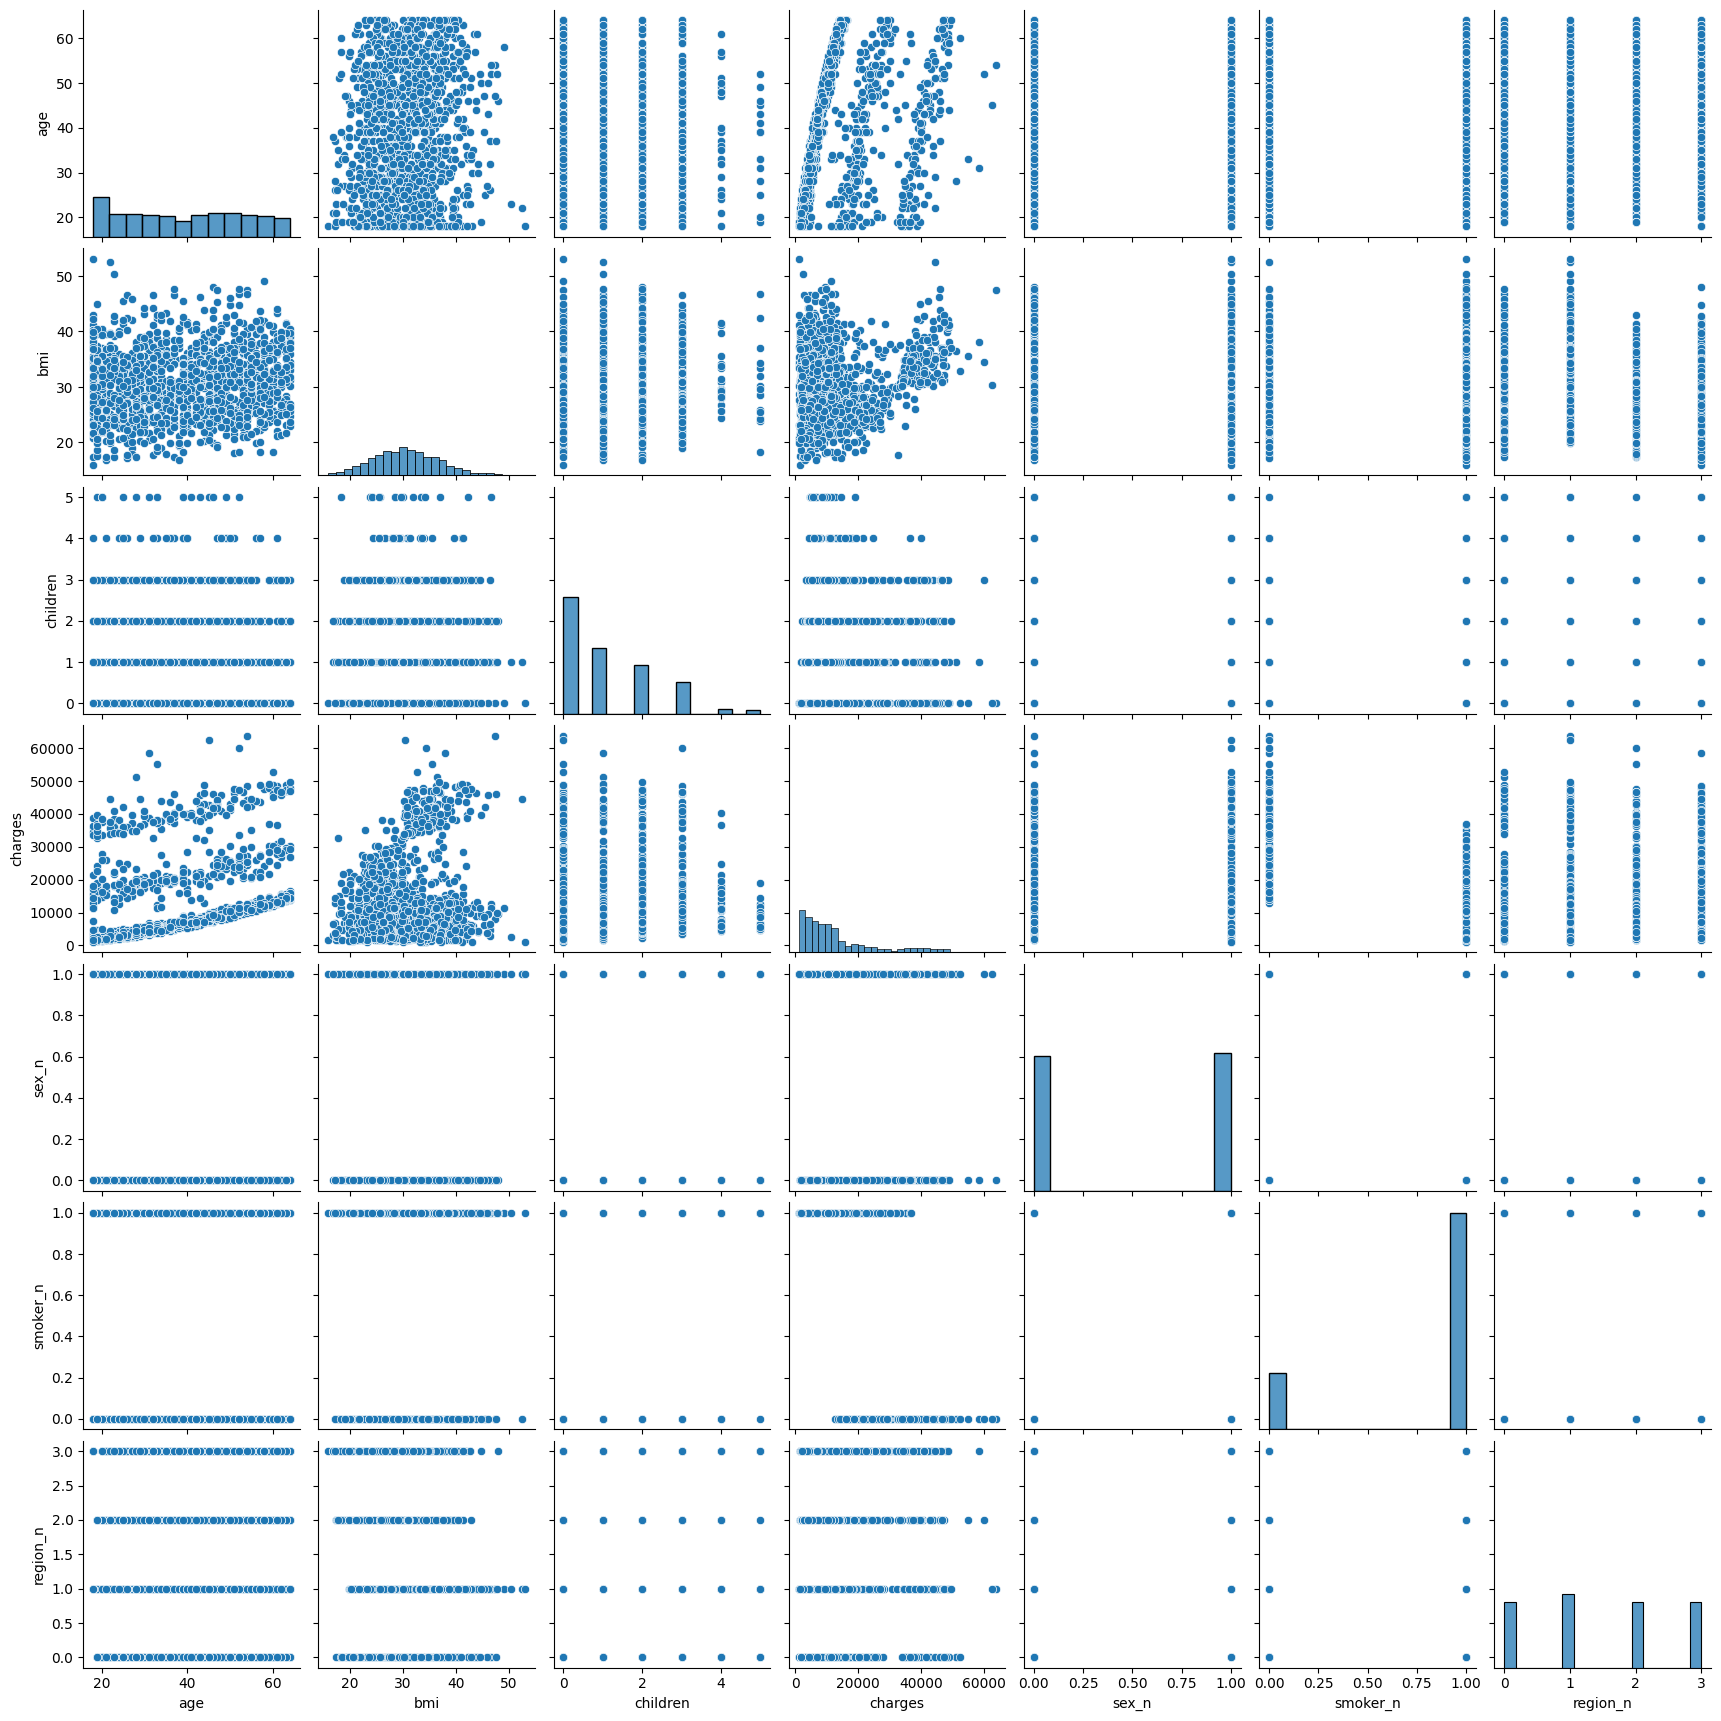

In [7]:
sns.pairplot(df)

In [8]:
df_final = df[['sex_n','age', 'bmi', 'children', 'smoker_n', 'region_n', 'charges']]
df_final.head()

,sex_n,age,bmi,children,smoker_n,region_n,charges
0,0,19,27.900,0,0,0,16884.92400
1,1,18,33.770,1,1,1,1725.55230
2,1,28,33.000,3,1,1,4449.46200
3,1,33,22.705,0,1,2,21984.47061
4,1,32,28.880,0,1,2,3866.85520


In [11]:
from sklearn.model_selection import train_test_split
X= df_final.drop(['charges'], axis=1)
y= df_final['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.4,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
print(f'los coheficientes del modelo es: {model.coef_}')
print(f'el intercepto del modelo es: {model.intercept_}')

los coheficientes del modelo es: [   -68.84304493    245.52975332    332.76314444    504.79657805
 -22831.1247945     303.37352948]
el intercepto del modelo es: 10575.46120377523


In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'El MSE es: {mean_squared_error(y_pred,y_test)}')
print(f'El R2 es: {r2_score(y_pred,y_test)}')

El MSE es: 34953346.34578466
El R2 es: 0.6686017551880784


In [29]:
df_final_2 = df_final.drop(['sex_n','region_n'],axis=1)
X = df_final_2.drop(['charges'], axis=1)
y = df_final_2['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model2 = LinearRegression()
model2.fit(X_train,y_train)

y_pred2 = model2.predict(X_test)

print(f'El intercepto es: {model2.intercept_}')
print(f'Los coheficientes es: {model2.coef_}')

print(f'El MSE es: {mean_squared_error(y_pred2,y_test)}')
print(f'El R2 es: {r2_score(y_pred2,y_test)}')


El intercepto es: 11536.136572186193
Los coheficientes es: [   257.07115795    327.52263109    427.19997095 -23653.21164629]
El MSE es: 33981653.95019775
El R2 es: 0.7054268129243102
